Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Read the data set

In [ ]:
sms=pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.loc[:, 'label'] = sms.label.map({'ham': 0, 'spam': 1})
sms.head()

<ipython-input-182-cce6af8c87fd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:, 'label'] = sms.label.map({'ham': 0, 'spam': 1})


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Explore the data

In [ ]:
print("No of Rows:", len(sms))

No of Rows: 5572


In [ ]:
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [ ]:
sms.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Plot

<Axes: ylabel='Frequency'>

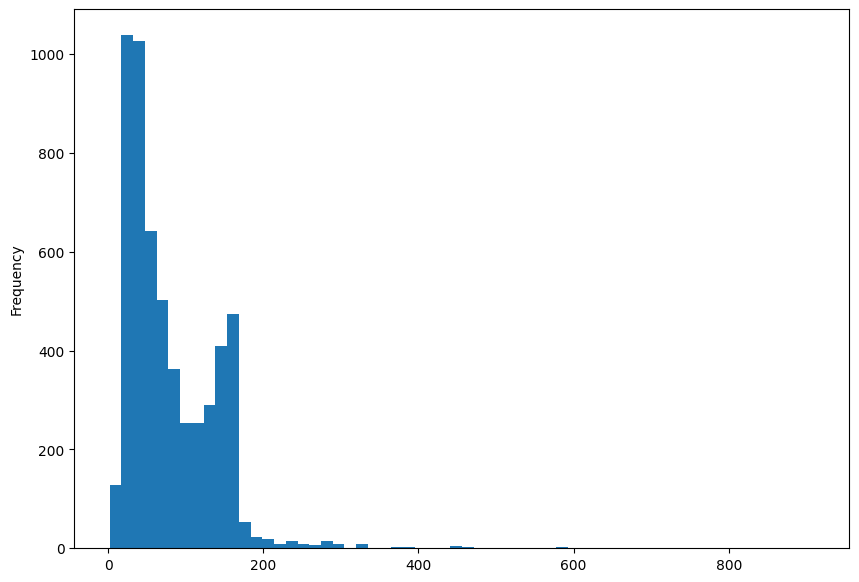

In [ ]:
sms['length'].plot(bins=60, kind='hist',figsize=(10,7))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

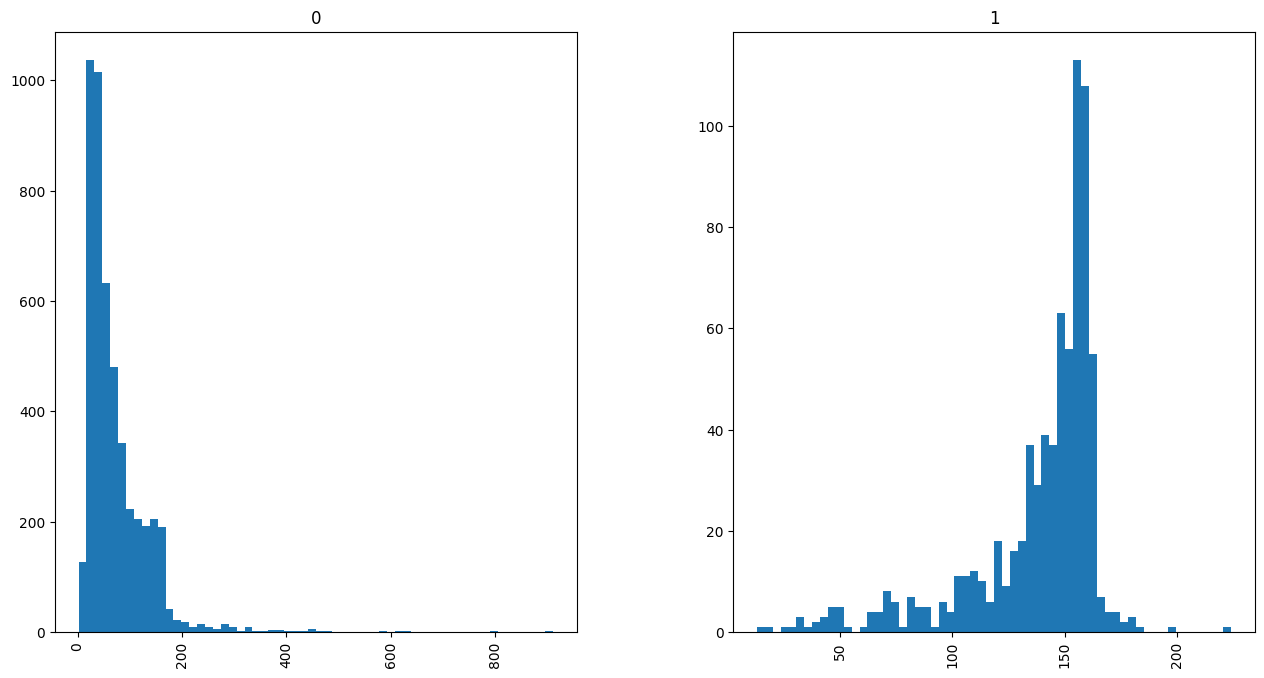

In [ ]:
sms.hist(column='length', by='label', bins=60, figsize=(15,8))

In [ ]:
#sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(sms['text'])

x_train, x_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.unique())

input=text[5571]

(4457, 8672)
(1115, 8672)
[0 1]


Implementation of ML Model

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704


In [ ]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
data=sms['text']
input = "To get 2.50 pounds free call credit and details of great offer"

In [ ]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
data.loc[len(data.index)]="hfwe ewfjb in jd eif"

In [ ]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572                                 hfwe ewfjb in jd eif
Name: text, Length: 5573, dtype: object

In [ ]:
text=count.fit_transform(data)

In [ ]:
text

<5573x8675 sparse matrix of type '<class 'numpy.int64'>'
	with 73921 stored elements in Compressed Sparse Row format>

In [ ]:
input=text[5572]